In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [2]:
def compute_sum(n, d):
    total_sum = 0
    for w in range(1, d + 1):
        binom_n_w = math.comb(n, w)  # Compute binomial coefficient C(n, w)
        binom_d_w = math.comb(d, w)  # Compute binomial coefficient C(d, w)
        total_sum += (2 ** w) * binom_n_w * binom_d_w  # Add the term to the sum
    return total_sum

In [8]:
##### Problem
in_dim = 2
degree = 4
shape = [in_dim, compute_sum(in_dim, degree), 1]
h = [16]
Batch_size = 16

In [11]:
print(shape)

[2, 40, 1]


In [9]:
import Neural_kan
import sys
sys.path.append(r'\\hhi.de\benutzer\home\prass\Master\Code_RNN_KAN\Test_KAN_vs_NN\Neural_kan.py') 
import importlib
importlib.reload(Neural_kan)
model = Neural_kan.Neural_Kan(shape = shape, h = h, device = None)

In [10]:
import torch
import itertools

class RandomPolynomial(torch.nn.Module):
    def __init__(self, input_dim, degree):
        super(RandomPolynomial, self).__init__()
        self.input_dim = input_dim
        self.degree = degree
        self.exponents = self.generate_exponents(degree, input_dim)
        torch.manual_seed(42)
        self.coefficients = torch.randn(len(self.exponents))
        print(self.exponents)
        print(self.coefficients)

    def forward(self, X):
        batch_size = X.shape[0]
        result = torch.zeros(batch_size, 1)

        # For each monomial (term) in the polynomial, compute the corresponding product of powers of X
        for idx, exp in enumerate(self.exponents):
            term = torch.ones(batch_size, 1)
            for dim, e in enumerate(exp):
                term *= X[:, dim].pow(e).view(-1, 1)
            result += self.coefficients[idx] * term
        return result

    def generate_exponents(self, degree, input_dim):
        exponents = []
        for exp_tuple in itertools.product(range(degree + 1), repeat=input_dim):
            if sum(exp_tuple) <= degree:
                exponents.append(exp_tuple)
        return exponents
    
poly = RandomPolynomial(input_dim=in_dim, degree=degree)


In [12]:
print(f"Total number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Total number of parameters (excluding biases): {sum(p.numel() for p in model.parameters() if p.dim() > 1)}")


Total number of parameters: 5801
Total number of parameters (excluding biases): 3840


In [18]:
import time
epochs = 1000
train_loss = []
model.train()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.)
criterion = torch.nn.MSELoss()
for epoch in range(epochs):
    running_loss = 0.0 
    for samples in range(100):
        start_time = time.time()
        optimizer.zero_grad()
        input = torch.randn(Batch_size, in_dim)
        target = poly(input)
        outputs = model(input)
        loss = criterion(target, outputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / 100
    train_loss.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
plt.plot(train_loss)
plt.title(f'train_loss on arbitary polynomial')
plt.legend()
plt.show()
print("Training Complete!")

Epoch [1/1000], Loss: 1.387326, lr: 0.001000
Epoch [2/1000], Loss: 0.616994, lr: 0.001000
Epoch [3/1000], Loss: 13.269797, lr: 0.001000
Epoch [4/1000], Loss: 3.183983, lr: 0.001000
Epoch [5/1000], Loss: 17.164727, lr: 0.001000
Epoch [6/1000], Loss: 1.344638, lr: 0.001000
Epoch [7/1000], Loss: 1.754427, lr: 0.001000
Epoch [8/1000], Loss: 1.014523, lr: 0.001000
Epoch [9/1000], Loss: 0.871482, lr: 0.001000
Epoch [10/1000], Loss: 1.219129, lr: 0.001000
Epoch [11/1000], Loss: 0.534182, lr: 0.001000
Epoch [12/1000], Loss: 3.380945, lr: 0.001000
Epoch [13/1000], Loss: 0.924405, lr: 0.001000
Epoch [14/1000], Loss: 1.221697, lr: 0.001000
Epoch [15/1000], Loss: 2.052006, lr: 0.001000
Epoch [16/1000], Loss: 1.913601, lr: 0.001000
Epoch [17/1000], Loss: 2.033904, lr: 0.001000
Epoch [18/1000], Loss: 0.443030, lr: 0.001000
Epoch [19/1000], Loss: 1.051862, lr: 0.001000
Epoch [20/1000], Loss: 0.392841, lr: 0.001000
Epoch [21/1000], Loss: 0.608131, lr: 0.001000
Epoch [22/1000], Loss: 0.842775, lr: 0.00

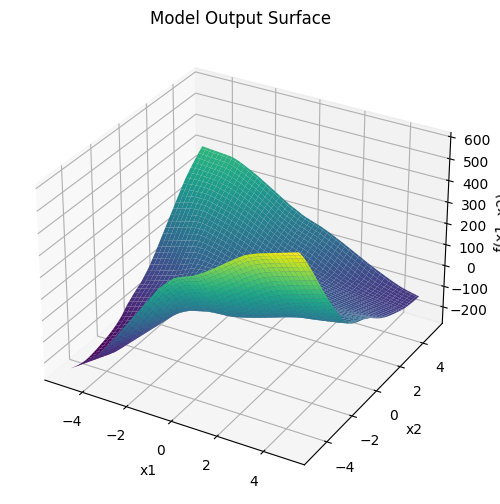

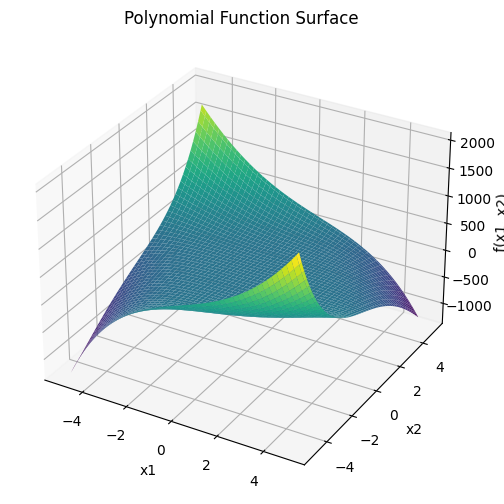

In [17]:
import torch
import matplotlib.pyplot as plt


model.eval()  # Set model to evaluation mode

# Create a grid of x1 and x2 values
x1_range = np.linspace(-5, 5, 100)
x2_range = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)

# Compute model output
with torch.no_grad():
    Z = model(X_input).numpy().reshape(X1.shape)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Model Output Surface')

plt.show()

x1_range = np.linspace(-5, 5, 100)
x2_range = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = poly(X_input).numpy().reshape(X1.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Polynomial Function Surface')

plt.show()

